# Drawing samples from popular probability distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Normal distribution

In [2]:
def gaussian(x, mu, sig):
    return 1 / (sig * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sig) ** 2)

Text(0, 0.5, 'counts')

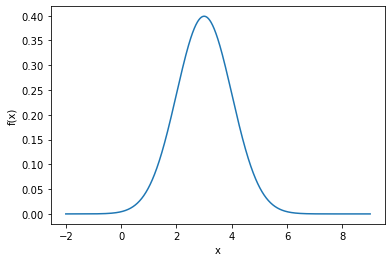

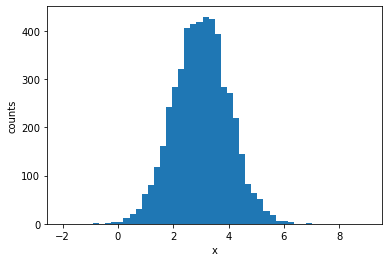

In [3]:
# plot probability density
mean, std = 3, 1
x = np.linspace(-2, 9, 1000)
y = gaussian(x, mean, std)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot samples
samples = np.random.normal(mean, std, size=5000)
plt.figure()
_, _, _ = plt.hist(samples, bins=50, range=(-2, 9))
plt.xlabel('x')
plt.ylabel('counts')

## Uniform distribution

In [4]:
def uniform(x, low, high):
    return np.where((x > low) & (x < high), 1/(high - low), 0)

Text(0, 0.5, 'counts')

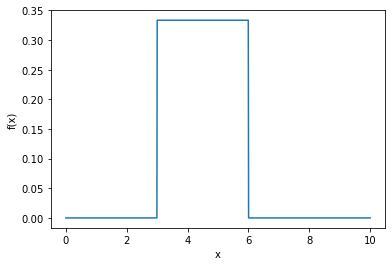

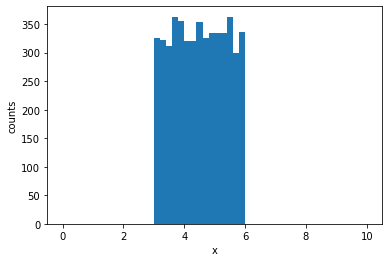

In [5]:
# plot probability density
low, high = 3, 6
x = np.linspace(0, 10, 1000)
y = uniform(x, low, high)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot samples
samples = np.random.uniform(low, high, size=5000)
plt.figure()
_, _, _ = plt.hist(samples, bins=50, range=(0, 10))
plt.xlabel('x')
plt.ylabel('counts')

## Triangular distribution

In [6]:
def triangular(x, l, m, r):
    return np.where((x > l) & (x < m), 2*(x-l)/((r-l)*(m-l)), np.where((x >= m) & (x < r), 2*(x-r)/((r-l)*(m-r)), 0))

Text(0, 0.5, 'counts')

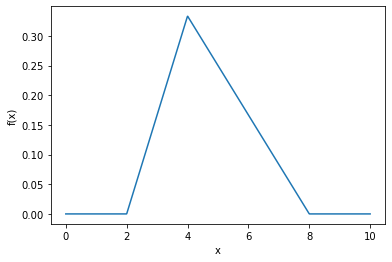

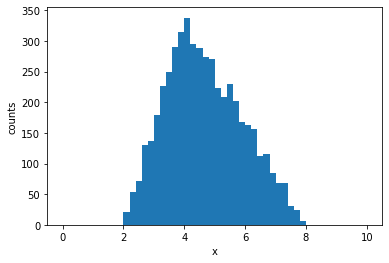

In [7]:
# plot probability density
l, m, r = 2, 4, 8
x = np.linspace(0, 10, 1000)
y = triangular(x, l, m, r)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot samples
samples = np.random.triangular(l, m, r, size=5000)
plt.figure()
_, _, _ = plt.hist(samples, bins=50, range=(0, 10))
plt.xlabel('x')
plt.ylabel('counts')

# Drawing samples from unpopular or custom probability distributions.

## Rejection sampling is one useful technique to sample from any distribution with known shape

Rejection sampling works as follows:

1. Define any rectangular box (x_left, x_right, y_top) that encloses the target distribution on a graph.
2. Within limits of the box, sample a point on the x-axis from a uniform distribution.
3. Draw a vertical line at this x-position, up to the maximum y-value of the box
4. Sample uniformly along this line. If the sampled value is greater than the value of the target distribution at this vertical line, reject the x-value and return to step 2; else the x-value is a sample from the target distribution.

In [8]:
def rejection_sampling(func, x_left, x_right, y_top, size=5000):
    x = np.random.uniform(x_left, x_right, size)
    y = np.random.uniform(0, y_top, size)
    return x[func(x) > y]

Text(0, 0.5, 'counts')

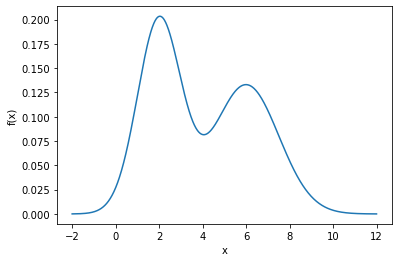

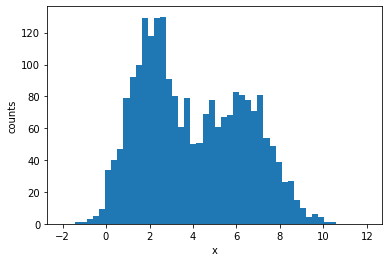

In [9]:
# plot probability density
l, r, t = -2, 12, 0.3
gaussian_mix = lambda x: 0.5 * (gaussian(x, 2, 1) + gaussian(x, 6, 1.5))
x = np.linspace(l, r, 1000)
y = gaussian_mix(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot samples
samples = rejection_sampling(gaussian_mix, l, r, t, 10000)
plt.figure()
_, _, _ = plt.hist(samples, bins=50, range=(l, r))
plt.xlabel('x')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

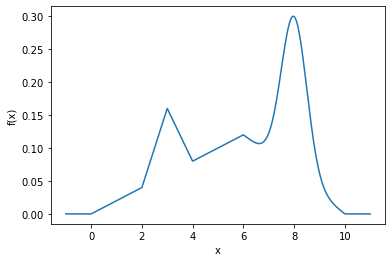

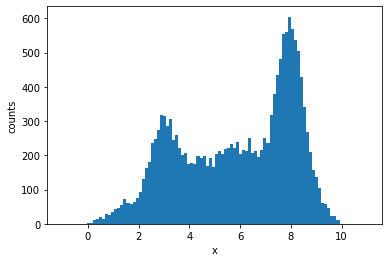

In [10]:
# plot probability density
l, r, t = -1, 11, 0.5
l1, m1, r1 = 2, 3, 4
l2, m2, r2 = 0, 6, 10
mix = lambda x: 0.1 * triangular(x, l1, m1, r1) + 0.6 * triangular(x, l2, m2, r2) + 0.3 * gaussian(x, 8, 0.5)
x = np.linspace(l, r, 1000)
y = mix(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot samples
samples = rejection_sampling(mix, l, r, t, 100000)
plt.figure()
_, _, _ = plt.hist(samples, bins=100, range=(l, r))
plt.xlabel('x')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

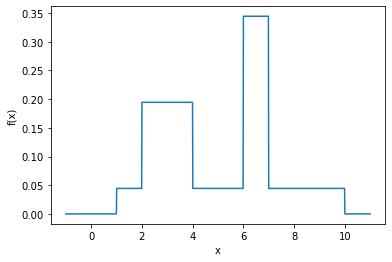

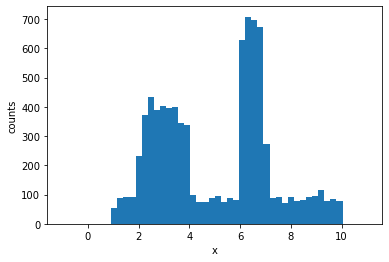

In [11]:
# plot probability density
l, r, t = -1, 11, 0.5
low1, high1 = 2, 4
low2, high2 = 6, 7
low3, high3 = 1, 10
mix = lambda x: 0.3 * uniform(x, low1, high1) + 0.3 * uniform(x, low2, high2) + 0.4 * uniform(x, low3, high3)
x = np.linspace(l, r, 1000)
y = mix(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot samples
samples = rejection_sampling(mix, l, r, t, 50000)
plt.figure()
_, _, _ = plt.hist(samples, bins=50, range=(l, r))
plt.xlabel('x')
plt.ylabel('counts')